In [125]:
import random

import numpy as np
from matplotlib import pyplot as plt

from extended_voronoi import ExtendedVoronoi
from geometry_tools import Point, Polygon

from lloyd_algorithm import ContinuousLloydAlgorithm
import os

In [128]:
def run_lloyd_algorithm(boundary, num_prototypes):
    lloyd = ContinuousLloydAlgorithm(boundary, num_prototypes)
    dst = lloyd.distortion
    #idx_iteration = 0
    while True:
        
        lloyd.single_iteration()
        #idx_iteration += 1
        if abs(dst - lloyd.distortion) < 0.001:
            break
        dst = lloyd.distortion
    
    #coords = [(point.x , point.y) for point in lloyd.prototypes]
    
    return lloyd

In [138]:

def run_simulation(n, boundary, num_prototypes, output_file='lloyd_simulation.npy'):
    
    directory = "resultats"
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    
    output_path = os.path.join(directory, output_file)
    
    prototypes_list = []
    polygon_list_list = []
    distortion_list = []
    
    for i in range(n):
        lloyd = run_lloyd_algorithm(boundary=boundary, num_prototypes=num_prototypes)
        proto = [(point.x , point.y) for point in lloyd.prototypes]
        poly = [Point.points_to_coords(p.vertices) for _, p in lloyd.polygon_list]

        prototypes_list.append(np.array(proto))
        polygon_list_list.append([np.array(p) for p in poly])
        distortion_list.append(lloyd.distortion)
    
    # Conversion des listes en objets numpy
    results = {
        'prototypes': np.array(prototypes_list, dtype=object),
        'polygons': np.array(polygon_list_list, dtype=object),
        'distortion': np.array(distortion_list)
    }
    
    
    np.save(output_path, results)
    
    return results


In [ ]:
run_simulation(n= 5, boundary= boundary, num_prototypes= num_prototypes)

In [140]:
loaded_results = np.load('resultats/lloyd_simulation.npy', allow_pickle=True).item()

In [152]:
loaded_results.keys()

dict_keys(['prototypes', 'polygons', 'distortion'])

In [153]:
(loaded_results['polygons'][0])

array([array([[308.21140859, 314.53049732],
              [203.95145813, 419.73228039],
              [380.25561249, 596.02193878],
              [485.44384137, 491.79471653],
              [471.20298624, 328.81266798]]),
       array([[308.21140859, 314.53049732],
              [250.18308015, 100.        ],
              [100.        , 100.        ],
              [100.        , 430.20995899],
              [203.95145813, 419.73228039]]),
       array([[380.25561249, 596.02193878],
              [203.95145813, 419.73228039],
              [100.        , 430.20995899],
              [100.        , 700.        ],
              [369.76961301, 700.        ]]),
       array([[471.20298624, 328.81266798],
              [485.44384137, 491.79471653],
              [700.        , 549.86440386],
              [700.        , 310.34276115],
              [490.22135796, 309.79759378]]),
       array([[485.44384137, 491.79471653],
              [380.25561249, 596.02193878],
              [369.76961

In [31]:
import time

In [115]:
boundary = [[100, 100], [700, 100], [700, 700], [100, 700]]
num_prototypes = 7

In [43]:
list_max_it = []
for i in range(100):
    _,_,it= run_lloyd_algorithm(boundary= boundary, num_prototypes= num_prototypes)
    list_max_it.append(it)

In [55]:
start = time.time()
distortion, coords,_ = run_lloyd_algorithm(boundary= boundary, num_prototypes= num_prototypes)
end = time.time()
print(end - start)

0.8780717849731445


In [129]:
llo = run_lloyd_algorithm(boundary= boundary, num_prototypes= num_prototypes)

In [137]:
lp = [Point.points_to_coords(p.vertices) for _, p in llo.polygon_list]

7

9219.024629016107


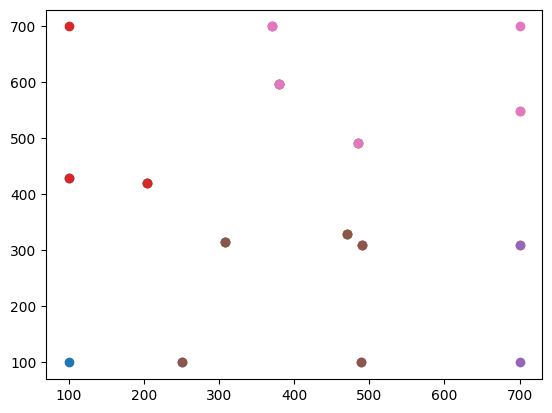

In [154]:
llo= run_lloyd_algorithm(boundary= boundary, num_prototypes= num_prototypes)
for i, (_, p) in enumerate(llo.polygon_list):
    polygon_coords = Point.points_to_coords(p.vertices)
    x_p  = [x for x, y in polygon_coords]
    y_p  = [y for x, y in polygon_coords]
    plt.scatter(x_p, y_p)

print(llo.distortion)   

In [73]:
test_poly = [(487.32360783682964, 263.55193291510324), (526.1350205233896, 100.0), (274.29243135423667, 100.0), (312.81017894172624, 263.15660080824637)]
x_p = [x for x, y in test_poly]
y_p = [y for x, y in test_poly]

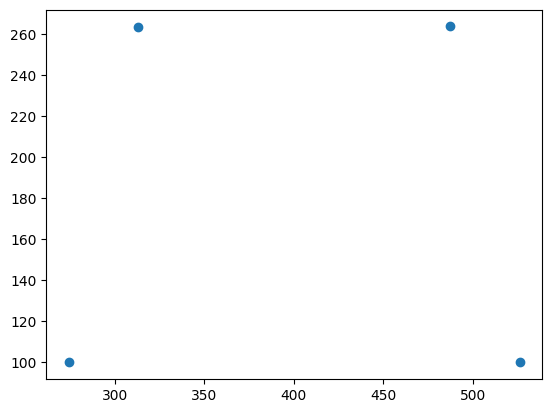

In [75]:
plt.scatter(x_p, y_p)

In [69]:
[(point.x , point.y) for point in llo.prototypes]

[(400.2320926587402, 176.73516354036678),
 (399.93405540198484, 523.2362081397748),
 (604.1364951219713, 225.12235023729673),
 (604.0291763246316, 474.9816477645745),
 (195.96804703089222, 224.9574905054873),
 (399.83964968120466, 349.97322963128545),
 (195.86799133419947, 474.93600295389064)]

In [28]:
((1000000/60)/60)/24

11.574074074074074

In [24]:
coords.sort()

[(205.66849629222176, 181.05588598383184),
 (604.5027749659703, 225.17959618436882),
 (413.1672800430027, 476.8724495532153),
 (413.4605513987756, 223.46571537886425),
 (217.83115401566204, 349.9372418895556),
 (604.3595374375038, 474.6135768797176),
 (205.45363889753074, 518.8563130824571)]